# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


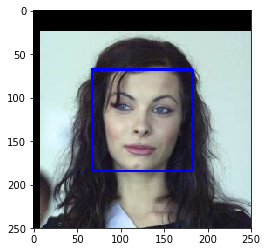

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

detected_in_human = sum(map(face_detector, human_files_short))
detected_in_dog = sum(map(face_detector, dog_files_short))
f'Faces detected in {detected_in_human}% of the short human dataset and {detected_in_dog}% of the dog dataset'  

'Faces detected in 95% of the short human dataset and 14% of the dog dataset'

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
use_cuda

True

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [2]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_image(img_path, img_size):
    tfms = transforms.Compose([
            transforms.Resize(img_size),
            transforms.CenterCrop(img_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
     ])
    img_tensor = tfms(Image.open(img_path))
    if use_cuda:
        img_tensor = img_tensor.cuda()
    return img_tensor

def predict_with_model(img_path, model, img_size = 224):
    '''
    Use a given model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        model: the model to use for prediction
    Returns:
        Index corresponding to the model's prediction
    '''
    img_tensor = load_image(img_path, img_size)
    model.eval()
    classes = model(img_tensor[None])
    max_idx = torch.argmax(classes)
    return max_idx.item() # predicted class index

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    return predict_with_model(img_path, VGG16)
   

Lets plot some of the images with corresponding labels to see if it works

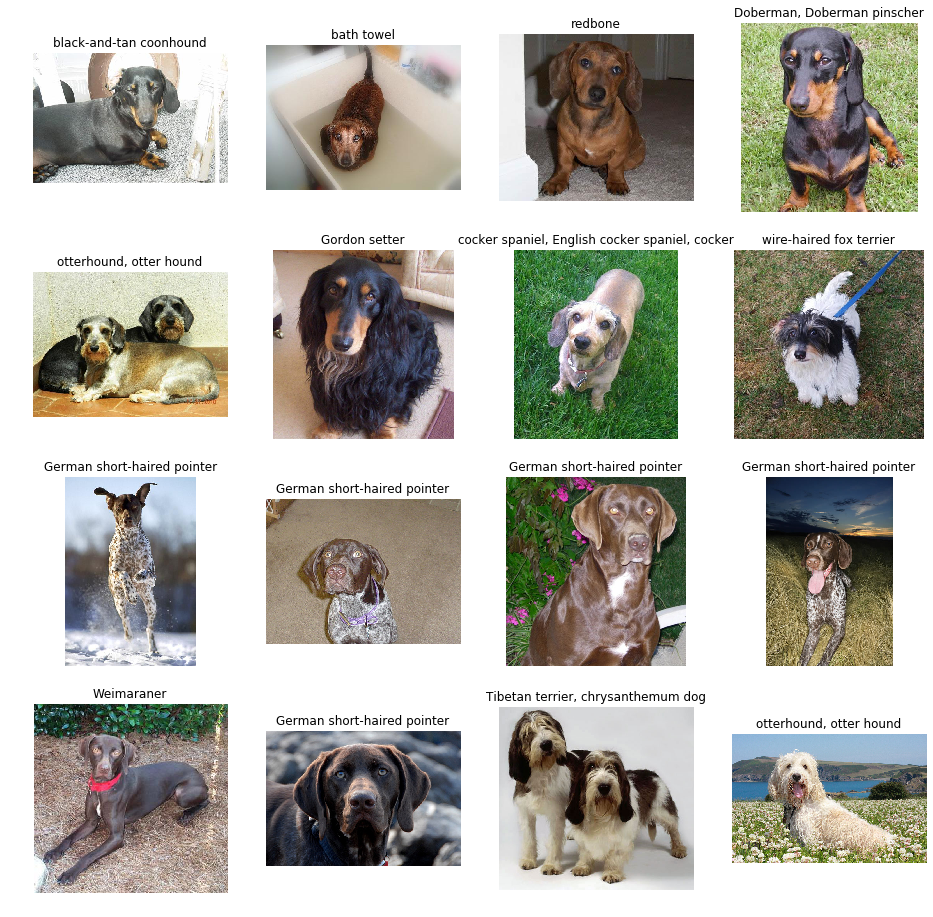

In [7]:
import pickle
import urllib
dict_url = 'https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl'
imagenet_class_dict = pickle.load(urllib.request.urlopen(dict_url) )

_, axs = plt.subplots(4,4,figsize=(16,16))
for ax, img in zip(axs.flatten(), dog_files_short):
    ax.imshow(Image.open(img))
    pred_idx = VGG16_predict(img)
    ax.set_title(imagenet_class_dict[pred_idx])
    ax.axis('off')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path

def is_dog_index(class_idx):
    return class_idx >= 151 and class_idx <= 268

def dog_detector(img_path):
    return is_dog_index(VGG16_predict(img_path))


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
detected_in_human = sum(map(dog_detector, human_files_short))
detected_in_dog = sum(map(dog_detector, dog_files_short))
f'Dogs detected in {detected_in_human}% of the short human dataset and {detected_in_dog}% of the dog dataset'  

'Dogs detected in 0% of the short human dataset and 99% of the dog dataset'

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
resnet = models.resnet50(pretrained = True)
if use_cuda:
    resnet = resnet.cuda()
resnet_predictor = lambda img: is_dog_index(predict_with_model(img, resnet))

In [11]:
detected_in_human = sum(map(resnet_predictor, human_files_short))
detected_in_dog = sum(map(resnet_predictor, dog_files_short))
f'Dogs detected with ResNet50 in {detected_in_human}% of the short human dataset and {detected_in_dog}% of the dog dataset'  

'Dogs detected with ResNet50 in 0% of the short human dataset and 100% of the dog dataset'

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import torch
import torchvision
from torchvision import datasets
import numpy as np
batch_size = 32
img_size = 128
train_tfms = transforms.Compose([
            transforms.Resize(img_size),
            transforms.ColorJitter(),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.RandomRotation(10),
            transforms.CenterCrop(img_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])

test_tfms = transforms.Compose([
            transforms.Resize(img_size),
            transforms.CenterCrop(img_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])
train_data = torchvision.datasets.ImageFolder('dogImages/train', transform = train_tfms)
val_data = torchvision.datasets.ImageFolder('dogImages/valid', transform = test_tfms)
test_data = torchvision.datasets.ImageFolder('dogImages/test', transform = test_tfms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=8)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=8)

loaders_scratch = {'train': train_loader, 'valid' : val_loader, 'test' : test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I first resize the images to have the smaller dimension equal to 128 and then center crop along the longer dimension to make it square. This way there is no stretching, though there is a risk of losing part of an image that could have been useful.
I picked the size 128 because I wanted a small size to make training and experimentation fast. I started with 224 as in imagenet, but then reduced it to make it faster and it still gave me ok results.

I'm augmenting the training set with horizontal flip, color jitter and a small random rotation (max 10 degrees) - this reduced my overfitting a bit. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
no_classes = len(train_data.classes)
no_classes

133

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        channels = [3, 16, 32, 64, 128, 256]
        self.convolutions = nn.Sequential()
        for idx in range(1, len(channels)):
            self.convolutions.add_module(f'conv_{idx}', 
                                         nn.Conv2d(channels[idx-1], channels[idx], kernel_size=3,padding=1))
            self.convolutions.add_module(f'bn_{idx}', nn.BatchNorm2d(channels[idx]))
            self.convolutions.add_module(f'relu_{idx}', nn.ReLU())
            self.convolutions.add_module(f'maxpool_{idx}', nn.MaxPool2d(kernel_size=2, stride=2))
        self.classifier = nn.Sequential(
            nn.Linear(channels[-1], 256),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(256, 256),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(256, no_classes),
        )
    def forward(self, x):
        ## Define forward behavior
        x = self.convolutions(x)
        x = F.adaptive_max_pool2d(x, 1).view(x.shape[0],-1)
        x = self.classifier(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
model_scratch

Net(
  (convolutions): Sequential(
    (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu_1): ReLU()
    (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu_2): ReLU()
    (maxpool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu_3): ReLU()
    (maxpool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv_4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_4): BatchNorm2d(128, e

Verify that I can pass a batch of images without an error and get the correct output shape:

In [15]:
b_x, b_y = next(train_loader.__iter__())
model_scratch(b_x.cuda()).shape

torch.Size([32, 133])

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I wanted to start with something as simple and small as possible to make training and iterating on the design faster. Each layer is a block of a 2d convolution and batchnorm followed by the relu activation and maxpooling. So it's very much like the VGG architecture, the number of layers and features is decided by the Net.channels list so I can modify the architecture without changing any other code.

For the classifier I first do adaptive max pool, to get one value out of each channel, since I only specify the desired output size this works regardless of the initial image size and the number of layers. After that I have three linear layers and I tried to make them as small as possible for fast training.

I first tried only 5 convolutional layers and 128 neurons in each linear layer - but it was giving me accuracy barely over 10%. I added one more layer and doubled the size of linear layers and got to 33%.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            optimizer.zero_grad()
            lss = criterion(output, target)
            lss.backward()
            optimizer.step()
            train_loss += data.shape[0] * lss
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        train_loss /= len(loaders['train'].dataset)    
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output = model(data)
                lss = criterion(output, target)
                valid_loss += data.shape[0] * lss
            valid_loss /= len(loaders['valid'].dataset)    
            # print training/validation statistics 
            print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss
                ))

        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            print('saving at valid loss', valid_loss.item())
            torch.save(model.state_dict(), save_path)
    # return trained model
    return model

In [18]:
%%time
# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.854095 	Validation Loss: 4.722507
saving at valid loss 4.722506999969482
Epoch: 2 	Training Loss: 4.714225 	Validation Loss: 4.613567
saving at valid loss 4.613566875457764
Epoch: 3 	Training Loss: 4.557256 	Validation Loss: 4.376111
saving at valid loss 4.376111030578613
Epoch: 4 	Training Loss: 4.375908 	Validation Loss: 4.128735
saving at valid loss 4.128735065460205
Epoch: 5 	Training Loss: 4.217922 	Validation Loss: 3.996902
saving at valid loss 3.9969022274017334
Epoch: 6 	Training Loss: 4.125458 	Validation Loss: 3.996988
Epoch: 7 	Training Loss: 4.041446 	Validation Loss: 4.013688
Epoch: 8 	Training Loss: 3.962204 	Validation Loss: 3.730918
saving at valid loss 3.7309176921844482
Epoch: 9 	Training Loss: 3.865127 	Validation Loss: 3.692703
saving at valid loss 3.6927030086517334
Epoch: 10 	Training Loss: 3.798950 	Validation Loss: 3.629860
saving at valid loss 3.6298604011535645
Epoch: 11 	Training Loss: 3.737411 	Validation Loss: 3.544694
saving at v

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.544621


Test Accuracy: 33% (282/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## using the same loaders as before
loaders_transfer = {'train': train_loader, 'valid' : val_loader, 'test' : test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg11_bn(pretrained=True)
model_transfer.classifier = nn.Sequential(
            nn.Linear(8192, 256),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(256, 256),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(256, no_classes),
        )
for param in model_transfer.features.parameters():
    param.requires_grad = False
if use_cuda:
    model_transfer = model_transfer.cuda()


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I'm using a VGG11 model that has been trained on the imagenet dataset - this dataset already has categories for some dog breeds among other real life images so I know it is capable of extracting features that are useful for detecting those. The fact that the model has already been trained on milions of images allows me to get much richer features than training on my 8 thousand dog pictures only. So I mostly need to train the classifier part and then optionally fine tune all the conv layers for better accuracy.

I chose VGG11 out of the avaialable pretrained imagenet models since that's the smallest one and resembling the most the one I created from scratch.

The classifier I'm adding is similar to what the original VGG network had, with the difference that I'm using much fewer parameters - since we are dealing with a simpler problem here. I was planning to increase it if needed but it turned out it works well enough. It's also almost the same as the classifer I had on my previous network, with the only difference being that all the outputs go directly to the linear layer rather than going through adaptive max pooling first.

That was the first thing I tried and it turned out to work fine, mostly thanks to the power of transfer learning.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [22]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(),lr=1e-3)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
# train the model by modyfing the classifier only
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer_cl.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer_cl.pt'))

Epoch: 1 	Training Loss: 4.473239 	Validation Loss: 3.132399
saving at valid loss 3.132398843765259
Epoch: 2 	Training Loss: 3.133182 	Validation Loss: 2.116900
saving at valid loss 2.1168997287750244
Epoch: 3 	Training Loss: 2.627292 	Validation Loss: 1.728436
saving at valid loss 1.7284362316131592
Epoch: 4 	Training Loss: 2.345246 	Validation Loss: 1.620376
saving at valid loss 1.6203762292861938
Epoch: 5 	Training Loss: 2.158027 	Validation Loss: 1.471952
saving at valid loss 1.4719517230987549
Epoch: 6 	Training Loss: 2.012284 	Validation Loss: 1.421238
saving at valid loss 1.421237826347351
Epoch: 7 	Training Loss: 1.919623 	Validation Loss: 1.397816
saving at valid loss 1.3978163003921509
Epoch: 8 	Training Loss: 1.795240 	Validation Loss: 1.397468
saving at valid loss 1.3974683284759521
Epoch: 9 	Training Loss: 1.789065 	Validation Loss: 1.314852
saving at valid loss 1.314851999282837
Epoch: 10 	Training Loss: 1.686477 	Validation Loss: 1.306118
saving at valid loss 1.306118130

Unfreeze all the layers and train some more.

In [24]:
for param in model_transfer.features.parameters():
    param.requires_grad = True
optimizer_transfer_all = optim.Adam(model_transfer.parameters(),lr=1e-4)
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer_all, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.537120 	Validation Loss: 1.156217
saving at valid loss 1.1562174558639526
Epoch: 2 	Training Loss: 1.337427 	Validation Loss: 1.134841
saving at valid loss 1.1348412036895752
Epoch: 3 	Training Loss: 1.234738 	Validation Loss: 1.068963
saving at valid loss 1.068962574005127
Epoch: 4 	Training Loss: 1.125016 	Validation Loss: 1.037410
saving at valid loss 1.0374102592468262
Epoch: 5 	Training Loss: 1.070256 	Validation Loss: 1.005488
saving at valid loss 1.0054876804351807
Epoch: 6 	Training Loss: 1.011272 	Validation Loss: 0.990816
saving at valid loss 0.9908162951469421
Epoch: 7 	Training Loss: 0.969126 	Validation Loss: 0.967971
saving at valid loss 0.9679713845252991
Epoch: 8 	Training Loss: 0.925531 	Validation Loss: 0.987509
Epoch: 9 	Training Loss: 0.885100 	Validation Loss: 0.918032
saving at valid loss 0.9180324077606201
Epoch: 10 	Training Loss: 0.847749 	Validation Loss: 0.962752
Epoch: 11 	Training Loss: 0.791436 	Validation Loss: 0.867161
saving a

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.014619


Test Accuracy: 74% (624/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [26]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    idx = predict_with_model(img_path, model_transfer, img_size = 128)
    return class_names[idx]

Plotting some to check if it looks reasonable

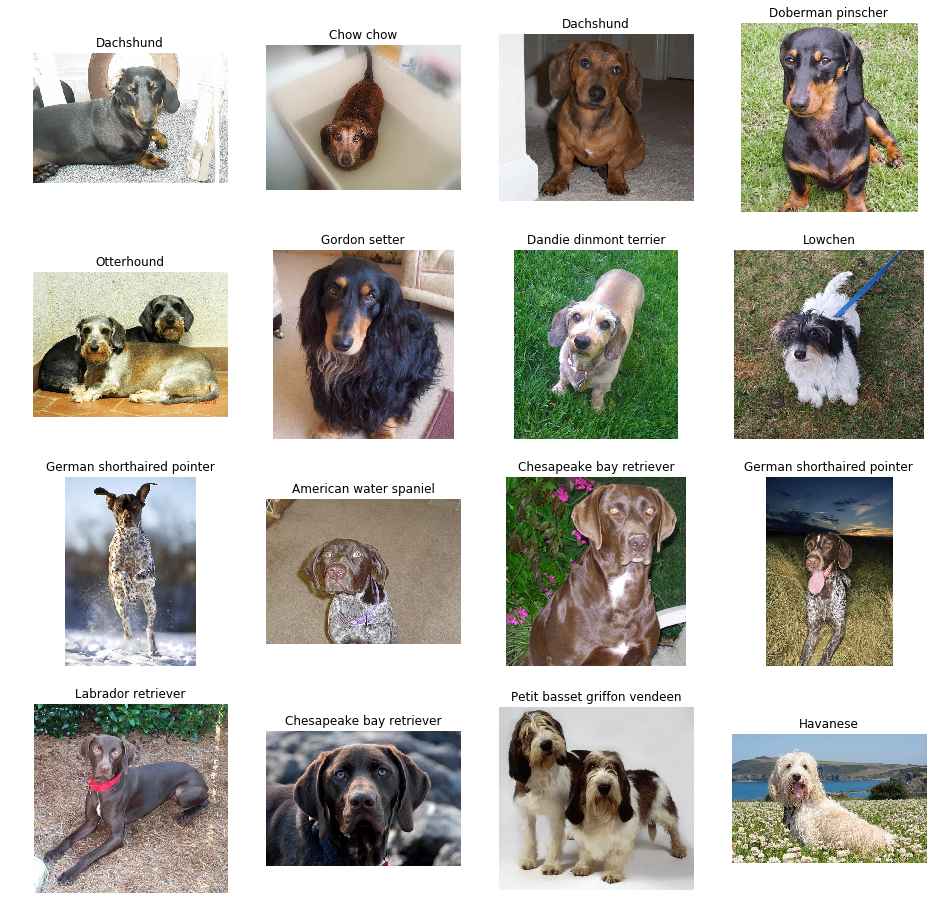

In [27]:
_, axs = plt.subplots(4,4,figsize=(16,16))
for ax, img in zip(axs.flatten(), dog_files_short):
    ax.imshow(Image.open(img))
    predicted = predict_breed_transfer(img)
    ax.set_title(predicted)
    ax.axis('off')

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [1]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    is_face = face_detector(img_path)
    is_dog = dog_detector(img_path)
    if is_face or is_dog:
        breed = predict_breed_transfer(img_path)
    plt.imshow(Image.open(img_path))
    if is_dog:
        plt.title(f"It's a dog! {breed} to be specific")
    elif is_face:
        plt.title(f"It's a human! though it looks a bit like a {breed}")
    else:
        # display the imagenet class if it's neither face nor dog
        pred_idx = VGG16_predict(img_path)
        thing = imagenet_class_dict[pred_idx]
        plt.title(f"I don't know what this is, maybe a '{thing}'")
    plt.axis('off')
    plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
- 74% accuracy is lower than I expected, but I was designing it for fast and simple. We could get it above 90 by using a better pretrained model (like resnet152 for example), higher size images and training it more.
- We use two separate models to detect if something is a dog and then what dog it is, it's possible that the general image net model wouldn't recognize a breed that our more specialized classifier handles correctly. We could fix that by adding and unknown class and some non dog images to the training.
- When comparing human faces to dogs we pass the whole image to the dog classifier, which might then use other parts of the image to determine the breed, not necessarily using the face at all. What we could do instead is find the bounding box of the face first and then zoom it in and use only that as the input for the second model.

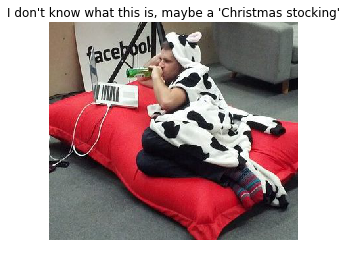

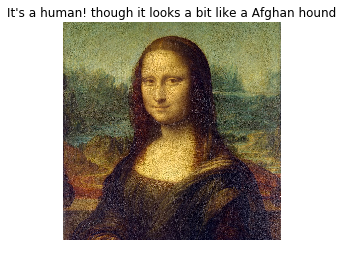

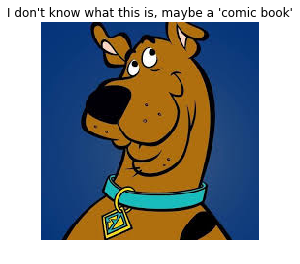

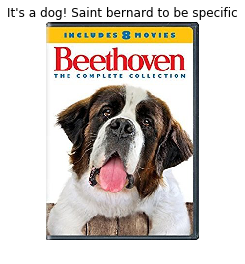

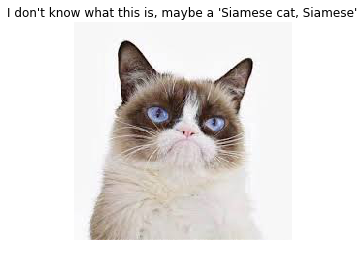

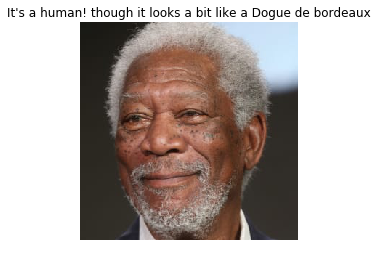

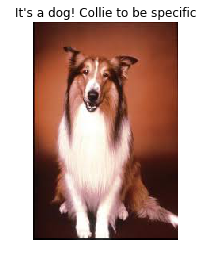

In [30]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

from pathlib import Path
for file in Path('my_test_images').iterdir():
    run_app(str(file))